In [8]:
# You need to load your OPENAI_API_KEY into your environment
with open("my_key.txt", "r") as f:
    key_file = f.read()

key_file = key_file.split("\n")
keys = {}

for line in key_file:
    key, value = line.split(':')
    keys[key.strip()] = value.strip()

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = keys['OPENAI_API_KEY']

# Image-To-Text

## Image-to-text Generation Example


In [2]:
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


/home/tom/miniconda3/envs/SemanticKernel/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


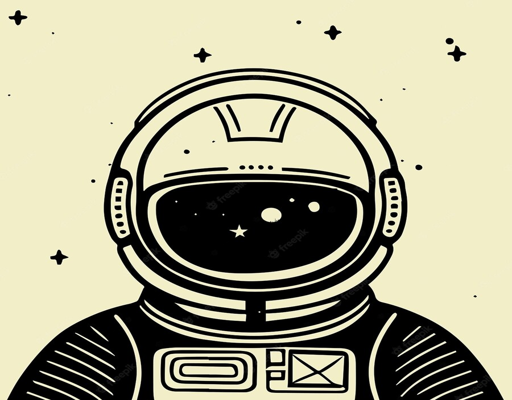

In [6]:
raw_img = Image.open("test_exp/spaceman avatar.jpg")
display(raw_img.resize((512,400)))

In [15]:
blip_model, blip_vis_processors, _ = load_model_and_preprocess(
    name="blip2_opt", 
    model_type="pretrain_opt2.7b", 
    is_eval=True, 
    device=device

)


In [8]:
image = blip_vis_processors["eval"](raw_img).unsqueeze(0).to(device)

In [13]:
prompt = "Question: What is in picture? Answer:"

blip_model.generate(
    {
        "image": image,
        "prompt": prompt
    }
)

['astronaut']

## Blip Chain

In [19]:
from langchain.tools import Tool

Tools = []

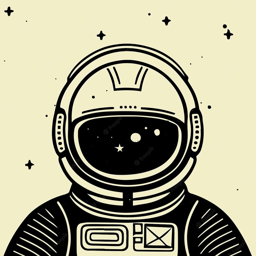

In [4]:
raw_img = Image.open("test_exp/spaceman avatar.jpg")
display(raw_img.resize((256,256)))

In [23]:
def read_picture(img_path: str = None) -> str:
    """Get the image from img_pth"""
    try:
        raw_img = Image.open(img_path)
    except:
        raise ValueError(f"Could not open image at path: `{img_path}`")
    
    image_input = blip_vis_processors["eval"](raw_img).unsqueeze(0).to(device)
    img_description = blip_model.generate(
        {
            "image": image_input,
            "prompt": "Question: What is in picture? Answer:"
        }
    )
    return img_description

read_picture_tool = Tool(
    name = "Read Picture",
    description = "Useful when you want to know what is in the picture.",
    func = read_picture
)

Tools.append(read_picture_tool)